In [105]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import glob

score_files = glob.glob('*.txt')
Q,S,scores=[],[],[]

# read question types
question_types = {}
with open('index/question_type.txt', 'r') as f:
    for line in f.readlines():
        l = line.strip().split(',')
        question_types[l[0]] = l[1]

# read score files
for i, score_file in enumerate(score_files):        
    Q.append({})
    S.append({})
    
    with open(score_file, 'r') as f:
        for line in f.readlines():
            l=line.strip()
            if not l: continue

            sp = l.split(',')    
            # score is the header
            if len(sp) == 1:
                scores.append(int(sp[0]))
            else:
                if sp[1] not in Q[i]:
                    Q[i][sp[1]] = 0
                    S[i][sp[1]] = 0

                Q[i][sp[1]] += 1
                S[i][sp[1]] += int(sp[2])

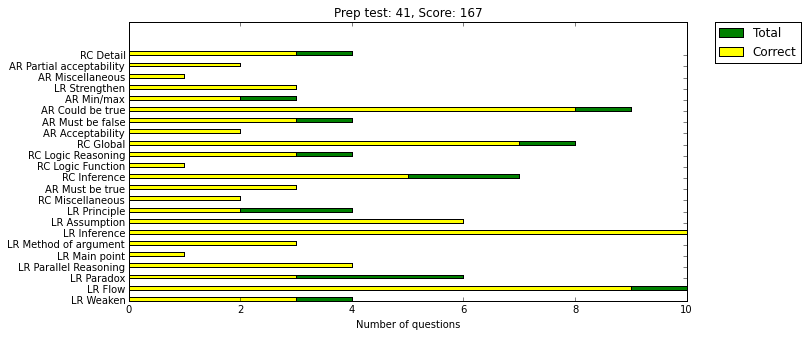

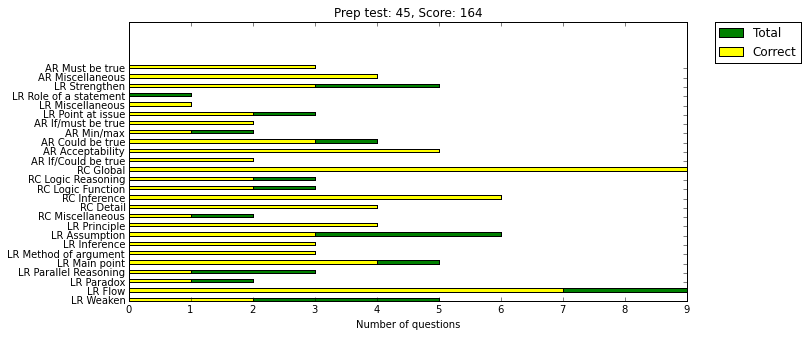

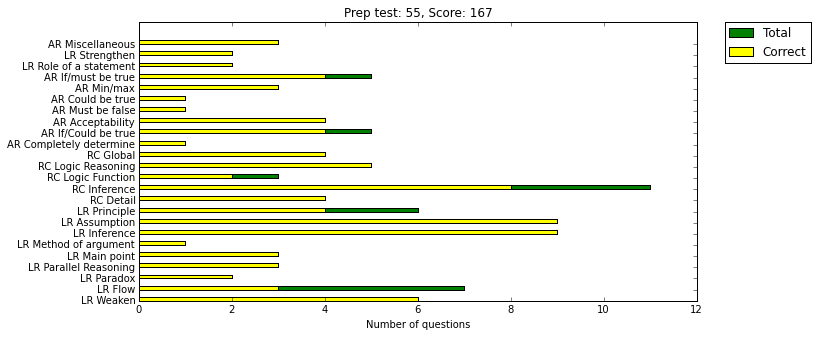

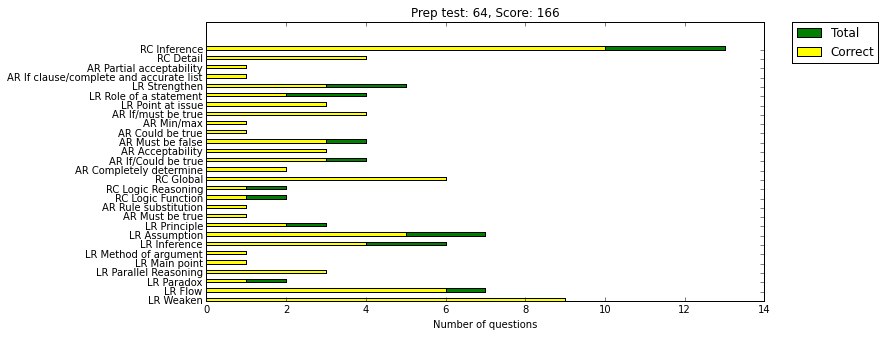

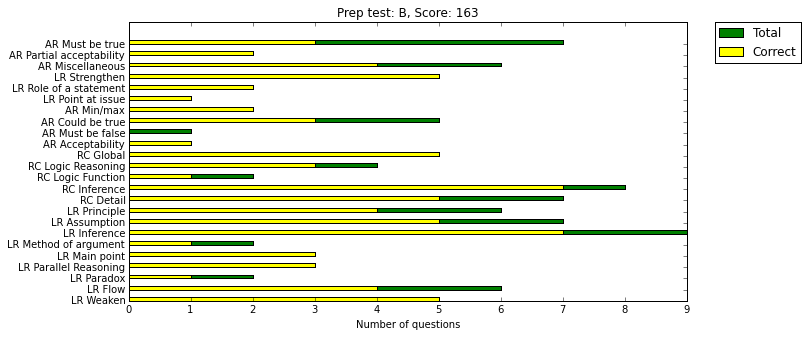

In [106]:
#change default figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
width = 0.35  

for i, score_file in enumerate(score_files):
    fig, ax = plt.subplots()
    y = []
    x1 = []
    x2 = []

    for key in Q[i]:
        y.append(question_types[key])
        x1.append(Q[i][key])
        x2.append(S[i][key])

    ind = np.arange(len(x1))    

    r1 = ax.barh(ind, x1, width, color='green')
    r2 = ax.barh(ind, x2, width, color='yellow')
    ax.set_title('Prep test: %s, Score: %d' % (score_files[i].split('.')[0], scores[i]))
    ax.set_xlabel('Number of questions')
    ax.set_yticks(ind)
    ax.set_yticklabels(y)
    ax.legend( (r1[0], r2[0]), ('Total', 'Correct'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    plt.show()